In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(train_imgs,train_labels),(test_imgs,test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
dict_labels = {
    0:"airplane",
    1:'automobile',
    2:"bird",
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

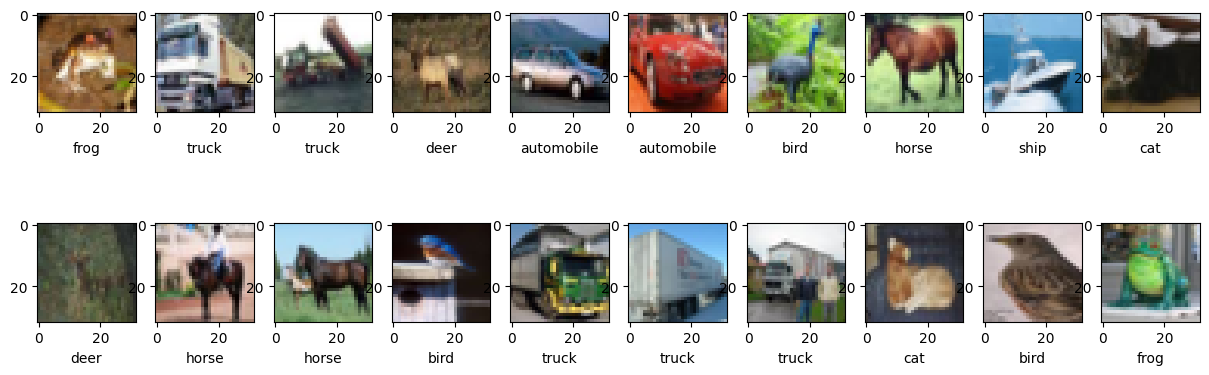

In [ ]:
def afficher_images(images,labels):
  plt.figure(figsize=(15,5))
  for index in range(20):
    plt.subplot(2,10,index+1)
    plt.imshow(images[index])
    plt.xlabel(dict_labels[labels[index][0]])
  plt.show()

afficher_images(train_imgs,train_labels)

In [ ]:
def normaliser_images(images):
  images = images/255.0
  return images

train_imgs = normaliser_images(train_imgs)

## Denoising

### Le denoising est le processus de retirer les pixels noirs qui se sont infiltrés dans une image, on parle de bruit car il s'agit de l'effet de la spécularité de la lumière sur la caméra

In [ ]:
import numpy as np
def ajouter_bruit(images):
  images_bruites = images + (0.1* np.random.normal(scale=1.0,size=images.shape))
  return np.clip(images_bruites,0.0,1.0)

noisy_train_imgs = ajouter_bruit(train_imgs)

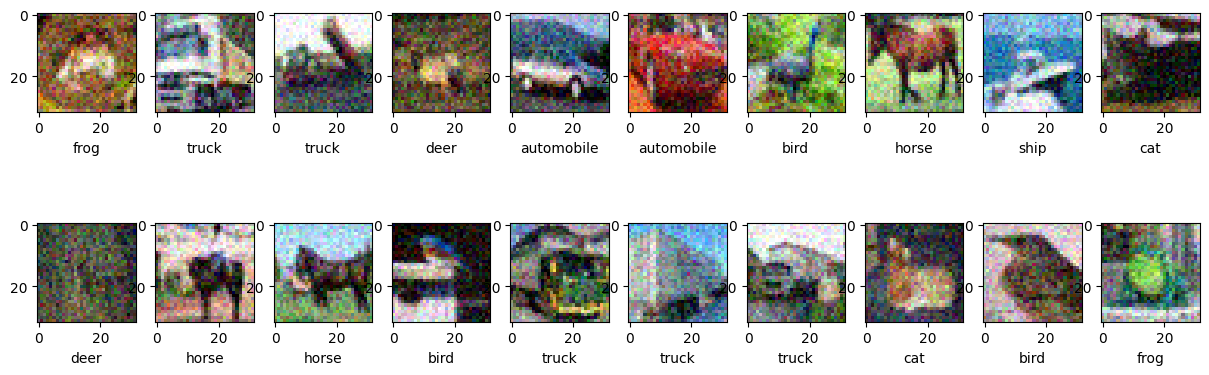

In [ ]:
afficher_images(noisy_train_imgs,train_labels)

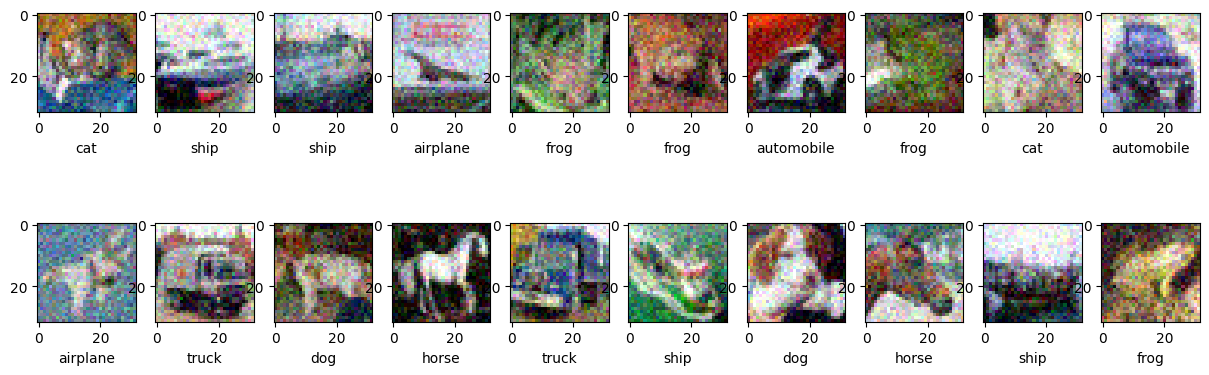

In [ ]:
test_imgs = normaliser_images(test_imgs)
noisy_test_imgs = ajouter_bruit(test_imgs)
afficher_images(noisy_test_imgs, test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
train_imgs,val_imgs,truth_train_imgs,truth_val_imgs = train_test_split(noisy_train_imgs,train_imgs,test_size=0.2,random_state=42)

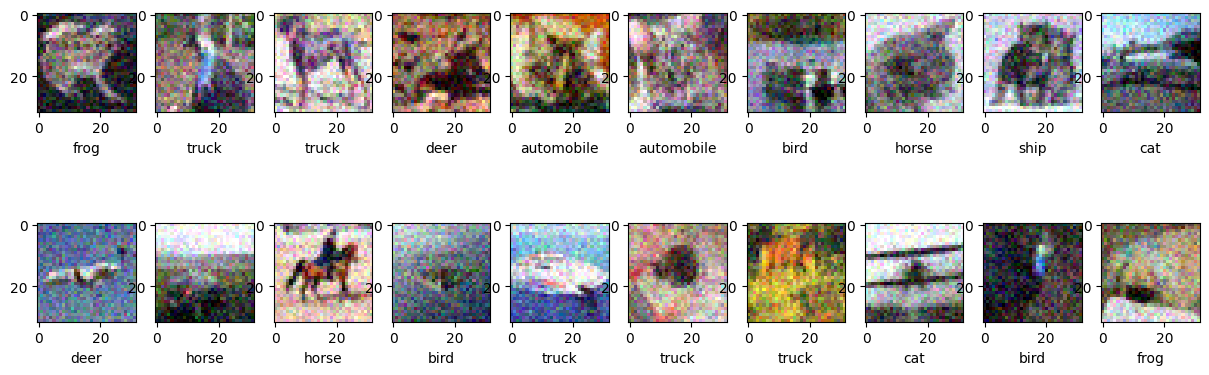

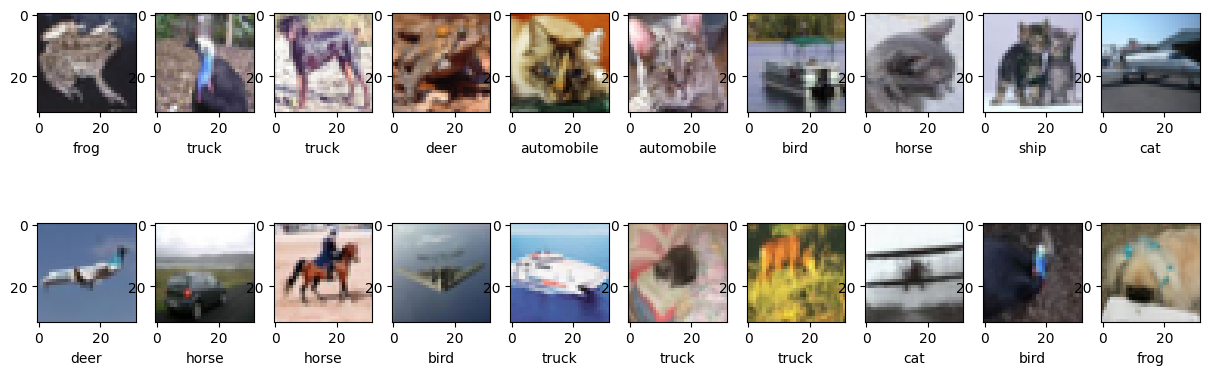

In [ ]:
afficher_images(train_imgs,train_labels)
afficher_images(truth_train_imgs,train_labels)

## Le modèle de CNN

In [ ]:
from tensorflow.keras.layers import (Input,Dense,Conv2D,MaxPooling2D,Dropout,
                                     BatchNormalization,Conv2DTranspose,UpSampling2D)
def model():
  model = models.Sequential()
  model.add(Input(shape=(32,32,3)))
  ##Encodage
  model.add(Conv2D(64,(3,3),padding='same',activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2),padding='same'))
  model.add(Dropout(0.3))
  model.add(Conv2D(64,(3,3),padding='same',activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2),padding='same'))
  model.add(Conv2D(64,(3,3),padding='same',activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2),padding='same'))
  ##Décodage
  model.add(Conv2DTranspose(64,(3,3),strides=2,activation="relu",padding="same"))
  model.add(Conv2DTranspose(64,(3,3),strides=2,activation="relu",padding="same"))
  model.add(Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding="same"))
  #Sortie du modèle.
  model.add(Conv2DTranspose(3,(1,1),activation='sigmoid',padding='same'))
  return model

denoiser = model()
denoiser.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [ ]:
denoiser.compile(optimizer='adam',
              loss='mse',metrics=['acc'])
history = denoiser.fit(train_imgs,truth_train_imgs,
                    epochs=50,batch_size=64,
                    validation_data=(val_imgs,truth_val_imgs))

Epoch 1/50
625/625 [==============================] - 24s 16ms/step - loss: 0.0123 - acc: 0.6439 - val_loss: 0.0081 - val_acc: 0.7220
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 0.0076 - acc: 0.7303 - val_loss: 0.0064 - val_acc: 0.7365
Epoch 3/50
625/625 [==============================] - 8s 14ms/step - loss: 0.0069 - acc: 0.7374 - val_loss: 0.0060 - val_acc: 0.7223
Epoch 4/50
625/625 [==============================] - 10s 16ms/step - loss: 0.0064 - acc: 0.7421 - val_loss: 0.0059 - val_acc: 0.7456
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.0062 - acc: 0.7446 - val_loss: 0.0063 - val_acc: 0.7493
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 0.0060 - acc: 0.7474 - val_loss: 0.0052 - val_acc: 0.7397
Epoch 7/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0058 - acc: 0.7471 - val_loss: 0.0057 - val_acc: 0.7612
Epoch 8/50
625/625 [==============================] - 9s 14ms/step 

1250/1250 [==============================] - 4s 3ms/step


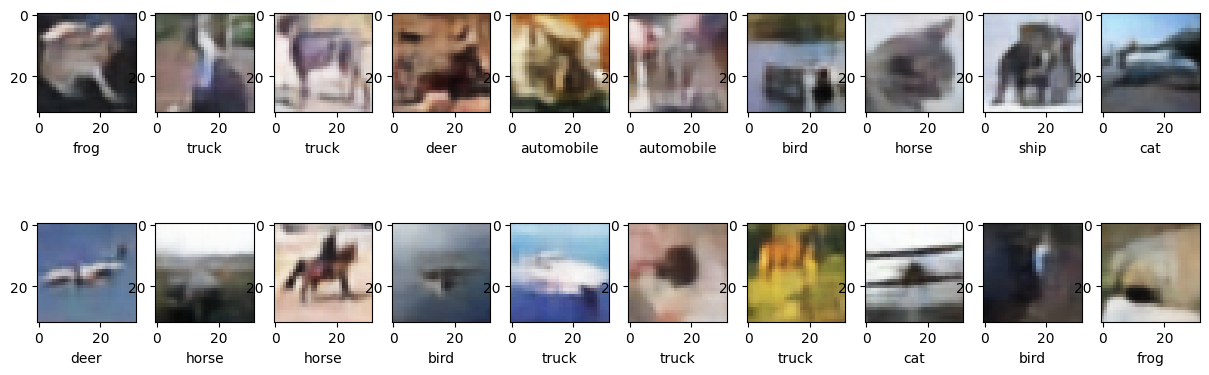

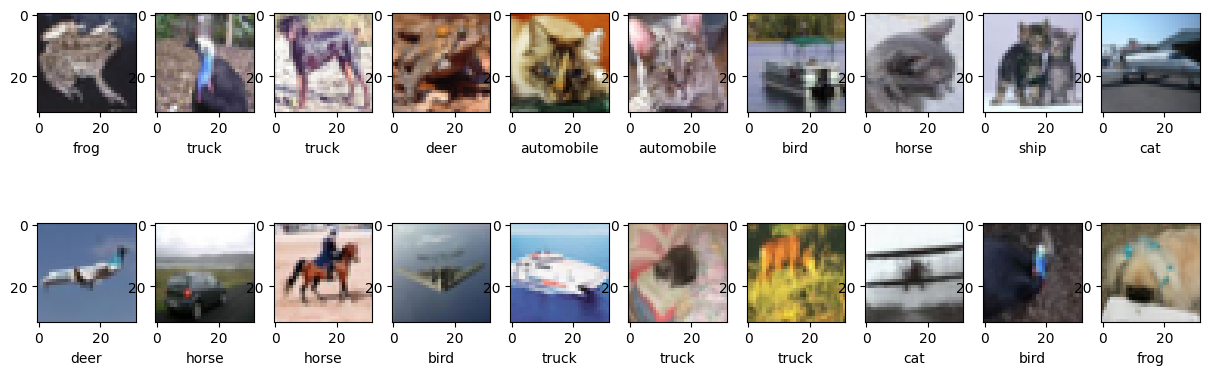

In [ ]:
##investigation sur les résultats du modèle.
predictions = denoiser.predict(train_imgs)
afficher_images(predictions,train_labels)
afficher_images(truth_train_imgs,train_labels)